In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, utils
from keras.layers import LeakyReLU
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

In [ ]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

In [ ]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [ ]:
y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), input_shape=(32, 32, 3)))
model.add(layers.LeakyReLU(alpha=0.1))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3)))
model.add(layers.LeakyReLU(alpha=0.1))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3)))
model.add(layers.LeakyReLU(alpha=0.1))
model.add(layers.MaxPooling2D((2, 2)))


model.add(layers.Flatten())
model.add(layers.Dense(128))
model.add(layers.LeakyReLU(alpha=0.1))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 13, 13, 64)        0         
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                 

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 75s 47ms/step - loss: 1.4017 - accuracy: 0.4949 - val_loss: 1.0939 - val_accuracy: 0.6058
Epoch 2/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.9851 - accuracy: 0.6532 - val_loss: 0.9741 - val_accuracy: 0.6564
Epoch 3/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.8144 - accuracy: 0.7162 - val_loss: 0.8429 - val_accuracy: 0.7104
Epoch 4/10
1563/1563 [==============================] - 71s 45ms/step - loss: 0.6957 - accuracy: 0.7584 - val_loss: 0.8161 - val_accuracy: 0.7147
Epoch 5/10
1563/1563 [==============================] - 75s 48ms/step - loss: 0.6035 - accuracy: 0.7887 - val_loss: 0.7974 - val_accuracy: 0.7284
Epoch 6/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.5209 - accuracy: 0.8167 - val_loss: 0.8637 - val_accuracy: 0.7140
Epoch 7/10
1563/1563 [==============================] - 73s 47ms/step - loss: 0.4502 - accuracy: 0.8409 - val_loss: 0.8648 -

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Точность на тестовом наборе данных:", test_accuracy)

313/313 [==============================] - 4s 12ms/step - loss: 1.0038 - accuracy: 0.7223
Точность на тестовом наборе данных: 0.7222999930381775


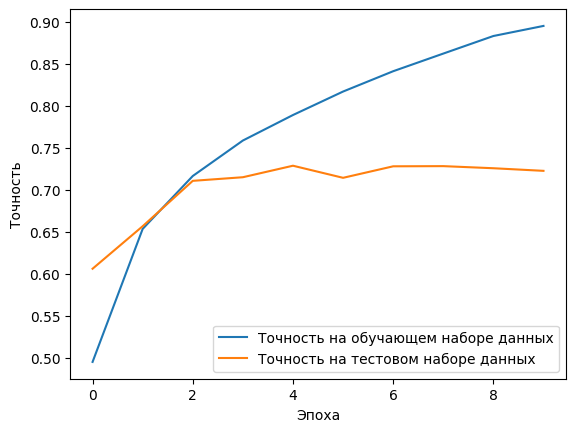

In [ ]:
plt.plot(history.history['accuracy'], label='Точность на обучающем наборе данных')
plt.plot(history.history['val_accuracy'], label='Точность на тестовом наборе данных')
plt.xlabel('Эпоха')
plt.ylabel('Точность')
plt.legend()
plt.show()